In [15]:
# Maybe: use square videos with power-of-2 size, so we don't have to think about resolution?

In [57]:
from PIL import Image ## pip install pillow
import numpy as np
import csv, gzip, shutil, re
import subprocess
from pathlib import Path

tmp_dir = Path('tmp-dir')
def clean_tmp_dir():
    tmp_dir.mkdir(exist_ok=True)
    for p in tmp_dir.iterdir(): p.unlink()


In [41]:
## vid2csv

clean_tmp_dir()
subprocess.run(f'ffmpeg -i waterfall.apng.png -vf scale=iw/8:ih/8 {tmp_dir}/%d.png'.split())
if not (tmp_dir/'1.png').exists(): raise Exception("ffmpeg failes!")

img_paths = sorted(tmp_dir.iterdir(), key=lambda p:int(p.name.split('.')[0]))
vid_size_str = 'x'.join(map(str,Image.open(img_paths[0]).size))
    
def get_pixelvec_for_path(path): return np.array(Image.open(path).convert('L').getdata())
pixelvecs = [list(get_pixelvec_for_path(p)) for p in img_paths]

csv_path = f'waterfall-{vid_size_str}.csv.gz'
with gzip.open(csv_path, 'wt', compresslevel=5) as f:
    writer = csv.writer(f)
    writer.writerows(pixelvecs)

vid_size=[117, 66]
pixelmat.shape=(380, 7722)


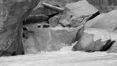

In [99]:
## csv2vid
clean_tmp_dir()

# 1. parse size
csv_path = max(Path().glob('waterfall-*.csv.gz'), key=lambda p:p.stat().st_mtime)  # newest!
vid_size = [int(d) for d in re.match(r'.*-([0-9]+)x([0-9]+)\.csv\.gz', str(csv_path)).groups()]
print(f'{vid_size=}')

# 2. get first row, reshape as np matrix, turn into image.
pixelmat = np.genfromtxt(csv_path,delimiter=',',dtype=np.int16)  # Does it need to be float?  Should I round it?
print(f'{pixelmat.shape=}')

# 3. dump it into tmp_dir/1.png
for i in 
im = Image.fromarray(pixelmat[0,].reshape((66,117)).astype(np.uint8))
im

# 4. ffmpeg the images into an mp4 (ffmpeg -y -r 30 -i tmp-dir/%d.png -vf fps=30 -s 116x66 -vcodec libx264 -pix_fmt yuv420p out.mp4)

